# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *6장 다양한 머신러닝 기법들*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 6.1 다항 회귀

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure',               
             'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)

Mean squared error: 28.814491614427215


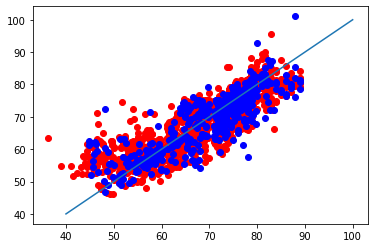

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

### 6.2 다항 회귀의 문제점 - 과적합, 그리고 폭발적인 복잡도 증가

In [ ]:
print('Mean squared error:', mean_squared_error(y_train, y_hat_train))

Mean squared error: 23.988382781120432


In [ ]:
X.shape

(2306, 84)

### 6.3 과적합과 과소적합 - 공짜 점심은 없다

### LAB 6-1: 다항 회귀의 회귀 함수를 그려 보자

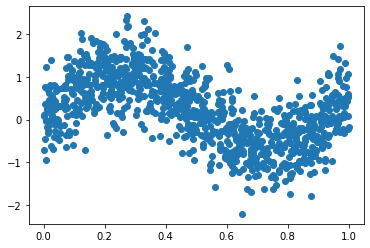

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')

plt.scatter(df['x'], df['y'])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1,1)     # 입력을 2차원 벡터가 되게 한다. shape = (m, 1)
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [ ]:
lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형

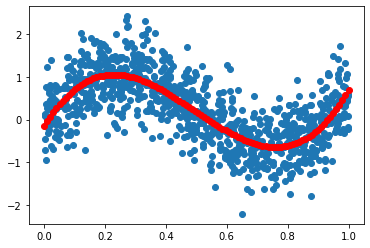

In [ ]:
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color='r')

### 6.4 결정 트리를 이용한 분류

### 6.5 어떤 속성이 가장 중요한가?

### 6.6 결정 트리를 손으로 만들어 보자 - ID3 알고리즘

### 6.7 지니 불순도를 이용한 효율적인 평가 - CART 알고리즘

### 6.8 사이킷런의 결정 트리로 붓꽃 분류하기

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris.dot"),
  feature_names=iris.feature_names,
)

!ls

dec_tree_for_iris.dot  dec_tree_for_iris.jpg  sample_data


In [ ]:
import matplotlib.pyplot as plt
dec_tree_img = plt.imread('/content/dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, 
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

UnidentifiedImageError: ignored

### LAB 6-2: 꽃받침의 너비와 길이로 결정트리를 만들자

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data[:,:2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris.dot"),
  feature_names=iris.feature_names[:2],
)

ValueError: ignored

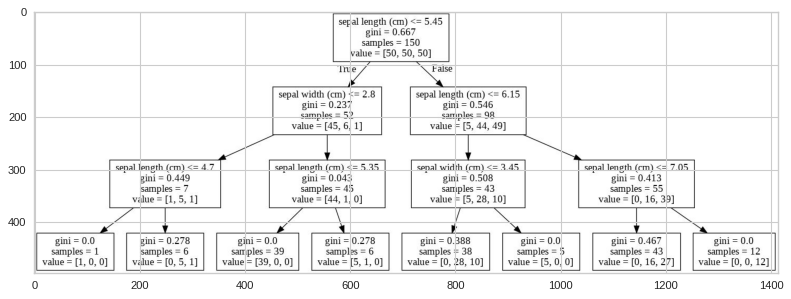

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

### LAB 6-3: 엔트로피를 이용하여 결정 트리 만들기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
dec_tree = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris.dot"),
  feature_names=iris.feature_names,
)

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt

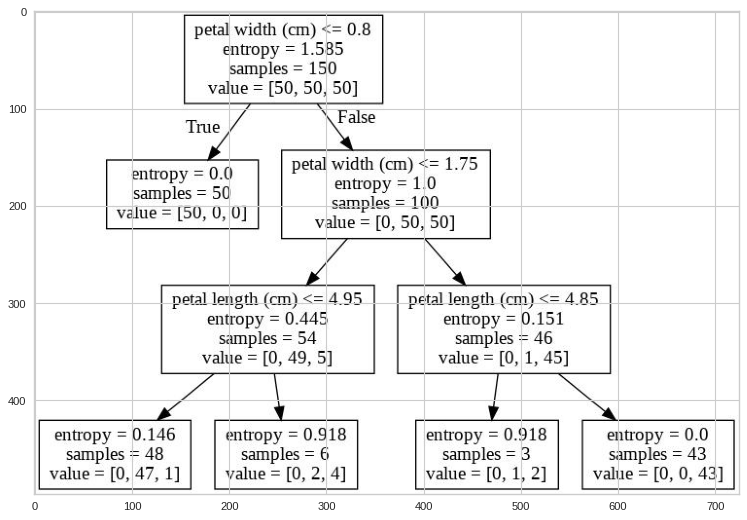

In [ ]:
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

### 6.9 SVM - 서포트 벡터 머신의 소개

### 6.10 하드 마진 서포트 벡터 머신의 구현

### 6.11 소프트 마진 서포트 벡터 머신의 구현

### 6.12 사이킷런을 이용한 서포트 벡터 머신 사용하기

In [ ]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(5)

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


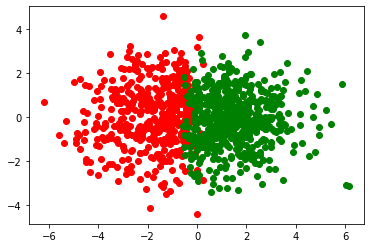

In [ ]:
df_positive = df[df['y']>0]     # y가 1인 데이터만 추출
df_negative = df[df['y']==0]    # y가 0인 데이터만 추출
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [ ]:
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy()           # x1, x2를 입력 벡터로 한다
y = df['y']                               # y열의 값이 레이블 
svm_simple = LinearSVC(C=1, loss='hinge') # SVM 클래스 생성
svm_simple.fit(X, y)                      # 입력과 레이블로 SVM 학습 실시

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [ ]:
svm_simple.predict([[0.12, 0.56], [-4, 40],  [0, 40], [5,20]])

array([0, 1, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=FutureWarning)


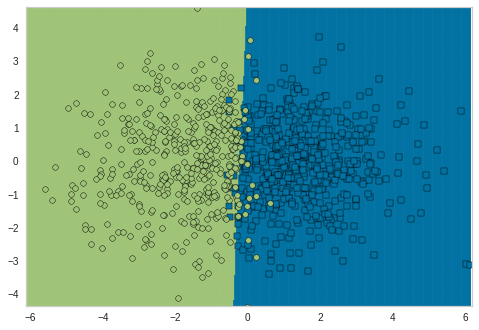

In [ ]:
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_simple, title="linear SVM")
viz.fit(X, y)
viz.draw(X, y)

### 6.13 파이프라인을 이용한 데이터 정제

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_std = Pipeline([                       # 파이프라인으로 SVM 객체 구성
  ("std", StandardScaler()),               # 데이터 표준화 단계 포함
  ("lsvm", LinearSVC(C=1, loss='hinge')),  # 선형 SVM 분류기 포함
])
svm_std.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lsvm',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=FutureWarning)


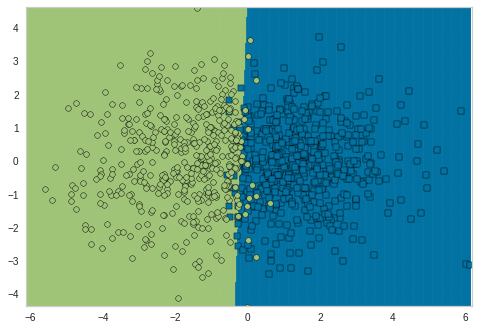

In [ ]:
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_std, title="Standardization - SVM")
viz.fit(X, y)
viz.draw(X, y)

### 6.14 다항 특정 변환을 통한 비선형 서포트 벡터 머신의 구현

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


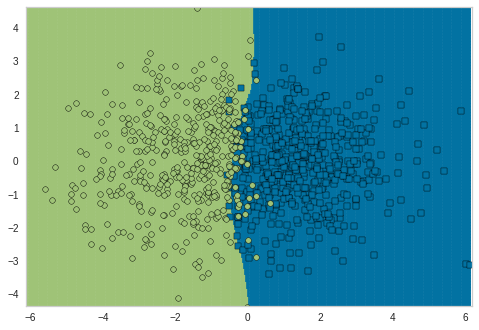

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
svm_poly = Pipeline([
  ("std", StandardScaler()),
  ("poly_inputs", PolynomialFeatures(degree=5)),
  ("lsmv", LinearSVC(C=0.01, loss="hinge"))
])
svm_poly.fit(X, y)
viz = DecisionViz(svm_poly, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

### LAB 6-4: 비선형 SVM을 이용한 데이터 분류

In [ ]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')
print(df.tail(5))

           x1        x2  y
995  1.112475 -0.180790  0
996 -2.544258 -0.559755  0
997 -1.044663  0.164435  1
998 -1.475026 -0.683385  0
999  1.860988  0.728986  1


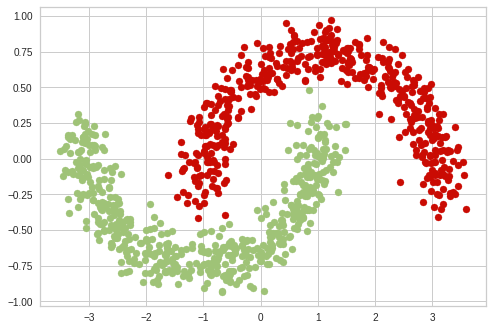

In [ ]:
df_positive = df[df['y']>0]
df_negative = df[df['y']==0]
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.contrib.classifier import DecisionViz
X = df[['x1', 'x2']].to_numpy()
y = df['y']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=FutureWarning)


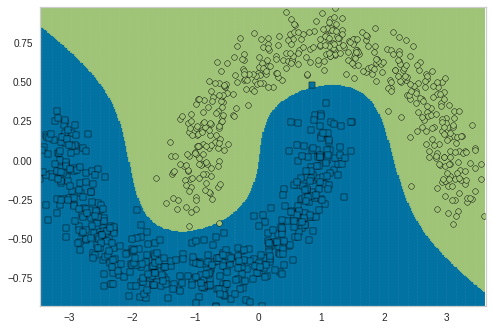

In [ ]:
polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("poly_features", PolynomialFeatures(degree=5)),
   ("svm_clf", LinearSVC(C=1, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

### 6.15 커널 트릭을 이용한 비선형 서포트 벡터 머신

### LAB 6-5: 커널 트릭을 이용한 비선형 SVM

In [ ]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')

from sklearn.svm import SVC  # 커널 트릭을 사용할 수 있는 SVM 분류기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz

X = df[['x1', 'x2']].to_numpy()
y = df['y']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=FutureWarning)


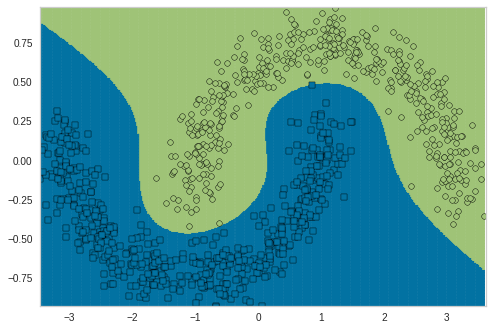

In [ ]:
polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("svm_clf", SVC(C=10, kernel = 'poly', degree = 4, coef0=2))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)